## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 50 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [7]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.3, 0.5, 0.7]
redice_lr_patient = [5, 10]

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
import itertools
from keras.layers import BatchNormalization

results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                                  min_lr=1e-12, 
                                  monitor='val_loss', 
                                  patience=reduce_patient, 
                                  verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.30, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizatio

50000/50000 [==============================] - 2s 40us/step - loss: 0.9411 - acc: 0.6854 - val_loss: 1.4298 - val_acc: 0.5026
Epoch 46/50
50000/50000 [==============================] - 2s 39us/step - loss: 0.9418 - acc: 0.6872 - val_loss: 1.4298 - val_acc: 0.5026
Epoch 47/50
50000/50000 [==============================] - 2s 39us/step - loss: 0.9413 - acc: 0.6865 - val_loss: 1.4297 - val_acc: 0.5028
Epoch 48/50
50000/50000 [==============================] - 2s 39us/step - loss: 0.9420 - acc: 0.6860 - val_loss: 1.4299 - val_acc: 0.5029

Epoch 00048: ReduceLROnPlateau reducing learning rate to 2.429999949526973e-06.
Epoch 49/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.9405 - acc: 0.6873 - val_loss: 1.4299 - val_acc: 0.5033
Epoch 50/50
50000/50000 [==============================] - 2s 39us/step - loss: 0.9415 - acc: 0.6873 - val_loss: 1.4299 - val_acc: 0.5033
Numbers of exp: 1, reduce_factor: 0.30, reduce_patient: 10
____________________________________________

50000/50000 [==============================] - 2s 40us/step - loss: 2.3518 - acc: 0.2257 - val_loss: 2.3431 - val_acc: 0.2319
Epoch 44/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.3437 - acc: 0.2276 - val_loss: 2.3369 - val_acc: 0.2334
Epoch 45/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.3372 - acc: 0.2289 - val_loss: 2.3307 - val_acc: 0.2353
Epoch 46/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.3309 - acc: 0.2310 - val_loss: 2.3242 - val_acc: 0.2365
Epoch 47/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.3253 - acc: 0.2322 - val_loss: 2.3181 - val_acc: 0.2391
Epoch 48/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.3180 - acc: 0.2332 - val_loss: 2.3121 - val_acc: 0.2411
Epoch 49/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.3118 - acc: 0.2359 - val_loss: 2.3063 - val_acc: 0.2426
Epoch 50/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 40us/step - loss: 2.3560 - acc: 0.2295 - val_loss: 2.3554 - val_acc: 0.2285
Epoch 42/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.3495 - acc: 0.2315 - val_loss: 2.3491 - val_acc: 0.2300
Epoch 43/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.3425 - acc: 0.2331 - val_loss: 2.3430 - val_acc: 0.2308
Epoch 44/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.3362 - acc: 0.2342 - val_loss: 2.3371 - val_acc: 0.2320
Epoch 45/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.3299 - acc: 0.2349 - val_loss: 2.3310 - val_acc: 0.2339
Epoch 46/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.3233 - acc: 0.2378 - val_loss: 2.3252 - val_acc: 0.2349
Epoch 47/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.3184 - acc: 0.2384 - val_loss: 2.3196 - val_acc: 0.2359
Epoch 48/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 39us/step - loss: 2.3446 - acc: 0.2321 - val_loss: 2.3603 - val_acc: 0.2327
Epoch 40/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.3375 - acc: 0.2334 - val_loss: 2.3535 - val_acc: 0.2328
Epoch 41/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.3308 - acc: 0.2339 - val_loss: 2.3477 - val_acc: 0.2337
Epoch 42/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.3228 - acc: 0.2369 - val_loss: 2.3414 - val_acc: 0.2347
Epoch 43/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.3165 - acc: 0.2383 - val_loss: 2.3355 - val_acc: 0.2365
Epoch 44/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.3112 - acc: 0.2405 - val_loss: 2.3298 - val_acc: 0.2379
Epoch 45/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.3044 - acc: 0.2424 - val_loss: 2.3244 - val_acc: 0.2392
Epoch 46/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 41us/step - loss: 2.3051 - acc: 0.2373 - val_loss: 2.3340 - val_acc: 0.2276
Epoch 38/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.2984 - acc: 0.2391 - val_loss: 2.3279 - val_acc: 0.2293
Epoch 39/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.2915 - acc: 0.2408 - val_loss: 2.3215 - val_acc: 0.2313
Epoch 40/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.2856 - acc: 0.2428 - val_loss: 2.3158 - val_acc: 0.2341
Epoch 41/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.2790 - acc: 0.2443 - val_loss: 2.3102 - val_acc: 0.2354
Epoch 42/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.2735 - acc: 0.2455 - val_loss: 2.3046 - val_acc: 0.2360
Epoch 43/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.2662 - acc: 0.2461 - val_loss: 2.2990 - val_acc: 0.2382
Epoch 44/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 40us/step - loss: 2.3855 - acc: 0.2218 - val_loss: 2.3846 - val_acc: 0.2217
Epoch 36/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.3779 - acc: 0.2242 - val_loss: 2.3769 - val_acc: 0.2254
Epoch 37/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.3694 - acc: 0.2257 - val_loss: 2.3698 - val_acc: 0.2270
Epoch 38/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.3615 - acc: 0.2270 - val_loss: 2.3630 - val_acc: 0.2288
Epoch 39/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.3538 - acc: 0.2289 - val_loss: 2.3561 - val_acc: 0.2308
Epoch 40/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.3458 - acc: 0.2315 - val_loss: 2.3494 - val_acc: 0.2319
Epoch 41/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.3384 - acc: 0.2331 - val_loss: 2.3428 - val_acc: 0.2343
Epoch 42/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 41us/step - loss: 0.5707 - acc: 0.8272 - val_loss: 1.4000 - val_acc: 0.5440
Epoch 32/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.5695 - acc: 0.8279 - val_loss: 1.4014 - val_acc: 0.5422

Epoch 00032: ReduceLROnPlateau reducing learning rate to 2.429999949526973e-06.
Epoch 33/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.5677 - acc: 0.8287 - val_loss: 1.4019 - val_acc: 0.5428
Epoch 34/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.5669 - acc: 0.8297 - val_loss: 1.4026 - val_acc: 0.5432
Epoch 35/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.5673 - acc: 0.8282 - val_loss: 1.4032 - val_acc: 0.5438
Epoch 36/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.5667 - acc: 0.8292 - val_loss: 1.4036 - val_acc: 0.5436
Epoch 37/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.5665 - acc: 0.8288 - 

50000/50000 [==============================] - 2s 42us/step - loss: 2.8284 - acc: 0.1341 - val_loss: 2.8242 - val_acc: 0.1448
Epoch 28/50
50000/50000 [==============================] - 2s 42us/step - loss: 2.8233 - acc: 0.1348 - val_loss: 2.8190 - val_acc: 0.1458
Epoch 29/50
50000/50000 [==============================] - 2s 44us/step - loss: 2.8176 - acc: 0.1366 - val_loss: 2.8137 - val_acc: 0.1465
Epoch 30/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.8123 - acc: 0.1368 - val_loss: 2.8089 - val_acc: 0.1479
Epoch 31/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.8062 - acc: 0.1385 - val_loss: 2.8036 - val_acc: 0.1490
Epoch 32/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.8038 - acc: 0.1381 - val_loss: 2.7989 - val_acc: 0.1498
Epoch 33/50
50000/50000 [==============================] - 2s 42us/step - loss: 2.7976 - acc: 0.1401 - val_loss: 2.7942 - val_acc: 0.1505
Epoch 34/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 41us/step - loss: 2.7609 - acc: 0.1449 - val_loss: 2.7481 - val_acc: 0.1505
Epoch 26/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.7543 - acc: 0.1454 - val_loss: 2.7427 - val_acc: 0.1511
Epoch 27/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.7511 - acc: 0.1456 - val_loss: 2.7375 - val_acc: 0.1523
Epoch 28/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.7446 - acc: 0.1467 - val_loss: 2.7326 - val_acc: 0.1527
Epoch 29/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.7400 - acc: 0.1485 - val_loss: 2.7279 - val_acc: 0.1534
Epoch 30/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.7350 - acc: 0.1479 - val_loss: 2.7232 - val_acc: 0.1543
Epoch 31/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.7311 - acc: 0.1489 - val_loss: 2.7183 - val_acc: 0.1548
Epoch 32/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 41us/step - loss: 2.8185 - acc: 0.1362 - val_loss: 2.8315 - val_acc: 0.1410
Epoch 24/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.8127 - acc: 0.1375 - val_loss: 2.8253 - val_acc: 0.1416
Epoch 25/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.8065 - acc: 0.1378 - val_loss: 2.8194 - val_acc: 0.1430
Epoch 26/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.8015 - acc: 0.1381 - val_loss: 2.8135 - val_acc: 0.1442
Epoch 27/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.7951 - acc: 0.1404 - val_loss: 2.8074 - val_acc: 0.1452
Epoch 28/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.7877 - acc: 0.1420 - val_loss: 2.8016 - val_acc: 0.1466
Epoch 29/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.7829 - acc: 0.1419 - val_loss: 2.7961 - val_acc: 0.1473
Epoch 30/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 41us/step - loss: 2.8997 - acc: 0.1245 - val_loss: 2.8795 - val_acc: 0.1326
Epoch 22/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.8923 - acc: 0.1269 - val_loss: 2.8730 - val_acc: 0.1340
Epoch 23/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.8872 - acc: 0.1280 - val_loss: 2.8669 - val_acc: 0.1349
Epoch 24/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.8792 - acc: 0.1296 - val_loss: 2.8609 - val_acc: 0.1358
Epoch 25/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.8729 - acc: 0.1303 - val_loss: 2.8547 - val_acc: 0.1367
Epoch 26/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.8668 - acc: 0.1311 - val_loss: 2.8485 - val_acc: 0.1375
Epoch 27/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.8606 - acc: 0.1316 - val_loss: 2.8427 - val_acc: 0.1378
Epoch 28/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 41us/step - loss: 2.7784 - acc: 0.1477 - val_loss: 2.7561 - val_acc: 0.1477
Epoch 20/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.7722 - acc: 0.1484 - val_loss: 2.7505 - val_acc: 0.1484
Epoch 21/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.7691 - acc: 0.1486 - val_loss: 2.7454 - val_acc: 0.1493
Epoch 22/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.7631 - acc: 0.1501 - val_loss: 2.7402 - val_acc: 0.1508
Epoch 23/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.7584 - acc: 0.1499 - val_loss: 2.7354 - val_acc: 0.1521
Epoch 24/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.7538 - acc: 0.1513 - val_loss: 2.7302 - val_acc: 0.1529
Epoch 25/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.7470 - acc: 0.1514 - val_loss: 2.7255 - val_acc: 0.1531
Epoch 26/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 42us/step - loss: 0.7156 - acc: 0.7613 - val_loss: 1.4584 - val_acc: 0.5146
Epoch 18/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.6951 - acc: 0.7693 - val_loss: 1.4528 - val_acc: 0.5108
Epoch 19/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.6741 - acc: 0.7766 - val_loss: 1.4431 - val_acc: 0.5211

Epoch 00019: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
Epoch 20/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.6197 - acc: 0.8006 - val_loss: 1.3605 - val_acc: 0.5427
Epoch 21/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.6078 - acc: 0.8055 - val_loss: 1.3852 - val_acc: 0.5390
Epoch 22/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.5993 - acc: 0.8089 - val_loss: 1.3903 - val_acc: 0.5400
Epoch 23/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.5916 - acc: 0.8104 - 

50000/50000 [==============================] - 2s 41us/step - loss: 3.0748 - acc: 0.1049 - val_loss: 3.0495 - val_acc: 0.1078
Epoch 12/50
50000/50000 [==============================] - 2s 41us/step - loss: 3.0687 - acc: 0.1050 - val_loss: 3.0427 - val_acc: 0.1091
Epoch 13/50
50000/50000 [==============================] - 2s 41us/step - loss: 3.0607 - acc: 0.1064 - val_loss: 3.0358 - val_acc: 0.1103
Epoch 14/50
50000/50000 [==============================] - 2s 41us/step - loss: 3.0541 - acc: 0.1061 - val_loss: 3.0287 - val_acc: 0.1102
Epoch 15/50
50000/50000 [==============================] - 2s 41us/step - loss: 3.0461 - acc: 0.1079 - val_loss: 3.0217 - val_acc: 0.1107
Epoch 16/50
50000/50000 [==============================] - 2s 41us/step - loss: 3.0396 - acc: 0.1087 - val_loss: 3.0149 - val_acc: 0.1118
Epoch 17/50
50000/50000 [==============================] - 2s 41us/step - loss: 3.0325 - acc: 0.1087 - val_loss: 3.0085 - val_acc: 0.1129
Epoch 18/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 41us/step - loss: 3.0802 - acc: 0.0909 - val_loss: 3.0659 - val_acc: 0.0927
Epoch 10/50
50000/50000 [==============================] - 2s 41us/step - loss: 3.0740 - acc: 0.0912 - val_loss: 3.0591 - val_acc: 0.0933
Epoch 11/50
50000/50000 [==============================] - 2s 41us/step - loss: 3.0672 - acc: 0.0928 - val_loss: 3.0522 - val_acc: 0.0939
Epoch 12/50
50000/50000 [==============================] - 2s 41us/step - loss: 3.0600 - acc: 0.0933 - val_loss: 3.0453 - val_acc: 0.0945
Epoch 13/50
50000/50000 [==============================] - 2s 41us/step - loss: 3.0530 - acc: 0.0935 - val_loss: 3.0385 - val_acc: 0.0957
Epoch 14/50
50000/50000 [==============================] - 2s 41us/step - loss: 3.0472 - acc: 0.0941 - val_loss: 3.0322 - val_acc: 0.0970
Epoch 15/50
50000/50000 [==============================] - 2s 41us/step - loss: 3.0395 - acc: 0.0951 - val_loss: 3.0254 - val_acc: 0.0984
Epoch 16/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 41us/step - loss: 3.0697 - acc: 0.0959 - val_loss: 3.0418 - val_acc: 0.0962
Epoch 8/50
50000/50000 [==============================] - 2s 41us/step - loss: 3.0623 - acc: 0.0968 - val_loss: 3.0354 - val_acc: 0.0974
Epoch 9/50
50000/50000 [==============================] - 2s 41us/step - loss: 3.0551 - acc: 0.0979 - val_loss: 3.0292 - val_acc: 0.0980
Epoch 10/50
50000/50000 [==============================] - 2s 41us/step - loss: 3.0491 - acc: 0.0988 - val_loss: 3.0229 - val_acc: 0.0995
Epoch 11/50
50000/50000 [==============================] - 2s 41us/step - loss: 3.0428 - acc: 0.0992 - val_loss: 3.0169 - val_acc: 0.1006
Epoch 12/50
50000/50000 [==============================] - 2s 41us/step - loss: 3.0372 - acc: 0.1008 - val_loss: 3.0106 - val_acc: 0.1016
Epoch 13/50
50000/50000 [==============================] - 2s 41us/step - loss: 3.0304 - acc: 0.1023 - val_loss: 3.0045 - val_acc: 0.1021
Epoch 14/50
50000/50000 [=======================

50000/50000 [==============================] - 2s 41us/step - loss: 3.1038 - acc: 0.0958 - val_loss: 3.0896 - val_acc: 0.1007
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 3.0966 - acc: 0.0974 - val_loss: 3.0819 - val_acc: 0.1011
Epoch 7/50
50000/50000 [==============================] - 2s 41us/step - loss: 3.0905 - acc: 0.0975 - val_loss: 3.0744 - val_acc: 0.1022
Epoch 8/50
50000/50000 [==============================] - 2s 41us/step - loss: 3.0815 - acc: 0.0983 - val_loss: 3.0671 - val_acc: 0.1027
Epoch 9/50
50000/50000 [==============================] - 2s 41us/step - loss: 3.0743 - acc: 0.0997 - val_loss: 3.0600 - val_acc: 0.1033
Epoch 10/50
50000/50000 [==============================] - 2s 41us/step - loss: 3.0667 - acc: 0.1005 - val_loss: 3.0531 - val_acc: 0.1040
Epoch 11/50
50000/50000 [==============================] - 2s 41us/step - loss: 3.0603 - acc: 0.1002 - val_loss: 3.0462 - val_acc: 0.1049
Epoch 12/50
50000/50000 [=========================

50000/50000 [==============================] - 2s 41us/step - loss: 3.1246 - acc: 0.0928 - val_loss: 3.1183 - val_acc: 0.0902
Epoch 4/50
50000/50000 [==============================] - 2s 41us/step - loss: 3.1173 - acc: 0.0932 - val_loss: 3.1097 - val_acc: 0.0912
Epoch 5/50
50000/50000 [==============================] - 2s 41us/step - loss: 3.1078 - acc: 0.0947 - val_loss: 3.1014 - val_acc: 0.0924
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 3.1007 - acc: 0.0958 - val_loss: 3.0933 - val_acc: 0.0941
Epoch 7/50
50000/50000 [==============================] - 2s 41us/step - loss: 3.0924 - acc: 0.0959 - val_loss: 3.0854 - val_acc: 0.0954
Epoch 8/50
50000/50000 [==============================] - 2s 41us/step - loss: 3.0840 - acc: 0.0977 - val_loss: 3.0772 - val_acc: 0.0957
Epoch 9/50
50000/50000 [==============================] - 2s 41us/step - loss: 3.0766 - acc: 0.0977 - val_loss: 3.0696 - val_acc: 0.0972
Epoch 10/50
50000/50000 [===========================

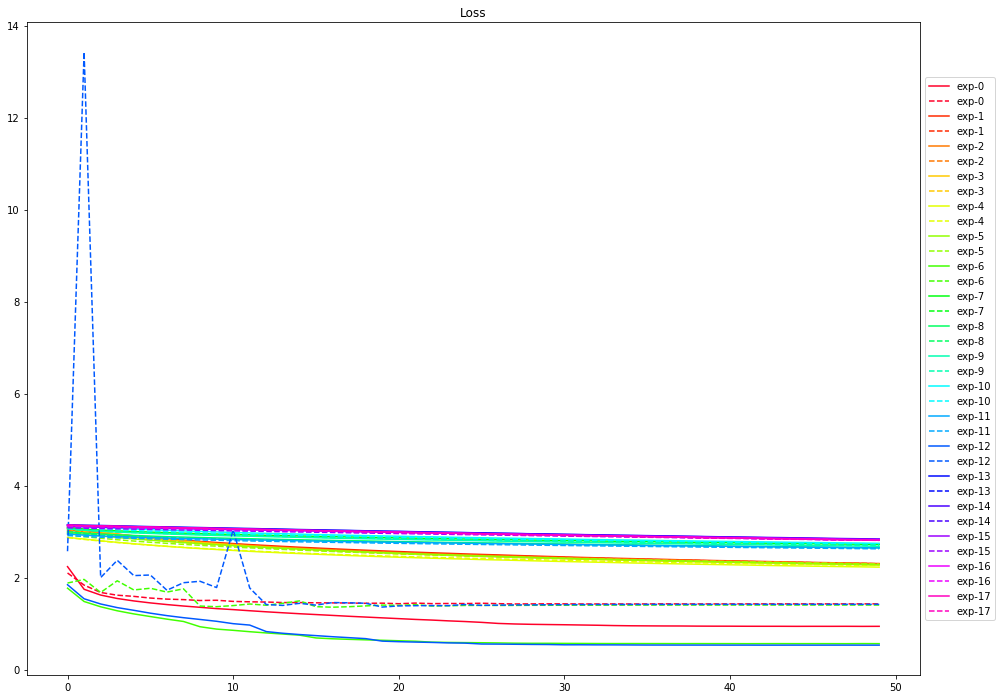

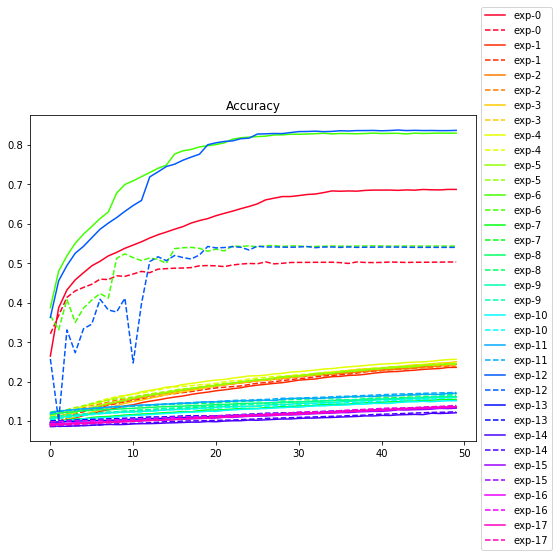

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [15]:
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: {}, reduce_factor: {}, reduce_patient: {}, {}".format(i, reduce_factor, reduce_patient, str(optim)))

Numbers of exp: 0, reduce_factor: 0.3, reduce_patient: 5, <keras.optimizers.SGD object at 0x000001844517DF28>
Numbers of exp: 1, reduce_factor: 0.3, reduce_patient: 10, <keras.optimizers.SGD object at 0x000001844517DF28>
Numbers of exp: 2, reduce_factor: 0.5, reduce_patient: 5, <keras.optimizers.SGD object at 0x000001844517DF28>
Numbers of exp: 3, reduce_factor: 0.5, reduce_patient: 10, <keras.optimizers.SGD object at 0x000001844517DF28>
Numbers of exp: 4, reduce_factor: 0.7, reduce_patient: 5, <keras.optimizers.SGD object at 0x000001844517DF28>
Numbers of exp: 5, reduce_factor: 0.7, reduce_patient: 10, <keras.optimizers.SGD object at 0x000001844517DF28>
Numbers of exp: 6, reduce_factor: 0.3, reduce_patient: 5, <keras.optimizers.Adam object at 0x000001844517DFD0>
Numbers of exp: 7, reduce_factor: 0.3, reduce_patient: 10, <keras.optimizers.Adam object at 0x000001844517DFD0>
Numbers of exp: 8, reduce_factor: 0.5, reduce_patient: 5, <keras.optimizers.Adam object at 0x000001844517DFD0>
Num